## Demonstration of linear regression on the advertising dataset

### Step 1: Read CSV

In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = os.path.dirname(os.path.realpath("__file__"))
df = pd.read_csv(f'{file_path}/../data/advertising.csv', index_col=0)
display(df)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### Step 2: Perform Simple Linear Regression
Our dataset has $m = 200$ examples. In this simple linear regression demo, we will regress *Sales* onto *TV*. We proceed with the assumption $Y = f(X) + \epsilon$ where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ and $f(X) = \beta_0 + \beta_1 X$. We wish to learn the optimal parameters of the function $\hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1 x = \hat{y}$. Our error metric is defined as the residual sum of squares: $\text{RSS} = e_1^2 + \cdots + e_m^2$, where $e_i = y_i - \hat{y}_i$. 

The best estimates for $\beta_0$, $\beta_1$ that minimize the residual sum of squares $\left(RSS = \sum_{i = 1}^m \left( y_i - \hat{y}_i \right)^2 \right)$ are 
$$
\hat{\beta}_1 = \frac{\sum_{i = 1}^m (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^m (x_i - \bar{x})^2} \approx \frac{\text{Cov}(X, Y)}{\text{Var}(X)}, \;\;\;
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}, \;\;\; \text{and} \\
\text{Var}(\hat{\beta}_1) = \frac{\sigma^2}{\sum_{i = 1}^m (x_i - \bar{x})^2}, \;\;\; \text{Var}(\hat{\beta}_0) = \frac{\sigma^2 \sum_{i = 1}^m x_i^2}{m \sum_{i = 1}^m (x_i - \bar{x})^2}, \;\;\; \hat{\sigma}^2 = \frac{1}{m - 2} \sum_{i = 1}^m\left( y_i - \hat{y}_i \right)^2
$$

<AxesSubplot:title={'center':'Relationship between Sales and TV'}, xlabel='TV', ylabel='Sales'>

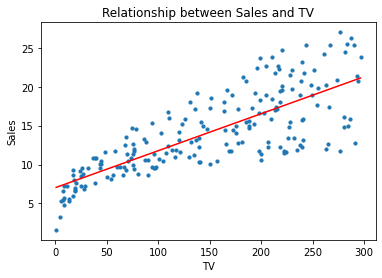

In [25]:
# define functions to organize computation
def compute_Sxx(x: np.ndarray):
    """
    Returns $\sum_{i=1}^m (x_i - \bar{x})^2$
    
    @args
    - x: np array ~ (m)
    """
    x_bar = np.mean(x)
    x_centered = x - x_bar
    return np.dot(x_centered, x_centered)

def compute_Sxy(x: np.ndarray, y: np.ndarray):
    """
    Returns $\sum_{i=1}^m (x_i - \bar{x})(y_i - \bar{y})$
    
    @args
    - x: np array ~ (m)
    - y: np array ~ (m)
    """
    x_centered = x - np.mean(x)
    y_centered = y - np.mean(y)
    return np.dot(x_centered, y_centered)

# compute the optimal weights
y = df['Sales'].to_numpy()
x = df['TV'].to_numpy()
beta_1_hat = compute_Sxy(x, y) / compute_Sxx(x)
beta_0_hat = np.mean(y) - np.mean(x) * beta_1_hat

# plot the original points
fig, ax = plt.subplots()
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('Relationship between Sales and TV')
ax.scatter(x, y, s=10)

# plot the line
x_linspace = np.linspace(start=np.min(x), stop=np.max(x))
y_pred = x_linspace * beta_1_hat + beta_0_hat
ax.plot(x_linspace, y_pred, color='red')

# display the plot
display(ax)

### Step 3: Perform Multiple Linear Regression
Let us denote *Sales* with $Y$. Then, we have $p = 3$ features. Our model assumes a linear relationship between $Y$ and $X_1, X_2, \ldots, X_p$. 
$$
    Y = \epsilon + \beta_0 + \sum_{i = 1}^n \beta_i X_i, \;\; \mathbb{E}[\epsilon] = 0, \;\; \text{Var}(\epsilon) = \sigma^2 
$$
We can express the above in matrix form. Denote $\mathbf{X}$ as an $m \times (p + 1)$ matrix with each row an input vector with $1$ in the first position corresponding to $\beta_0$. Further, let $\boldsymbol{\beta} = (\beta_0, \beta_1, \ldots, \beta_p)^\intercal$, and let $\mathbf{y}$ denote the $m$-vector of outputs corresponding to $\mathbf{X}$. Then, 
$$
    \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}  , \;\; \mathbb{E}[\epsilon_i] = 0, \;\; \text{Var}(\epsilon_i) = \sigma^2 
$$
We can compute the unbiased estimator $\hat{\boldsymbol{\beta}}$ as follows:
$$
    \text{RSS} = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^\intercal (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) \Rightarrow 
    \frac{\partial \text{RSS}}{\partial \boldsymbol{\beta}} = -2 \mathbf{X}^\intercal (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) \Rightarrow
    \hat{\boldsymbol{\beta}} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{y} \\
    \text{Var}(\hat{\boldsymbol{\beta}}) = (\mathbf{X}^\intercal \mathbf{X})^{-1} \sigma^2, \;\;\; \hat{\sigma}^2 = \frac{1}{m - p - 1} \sum_{i = 1}^m (y_i - \hat{y}_i)^2 
$$

In [10]:
# define functions to organize computation
def compute_pseudoinverse(X: np.ndarray):
    """
    Returns $(X^T X)^{-1} X^T$
    
    @args
    - X: np array ~ (m, p+1)
    """
    return la.inv(X.T @ X) @ X.T

def compute_mse(X: np.ndarray, y: np.ndarray, f: callable):
    """
    Returns the MSE: Average[ (y - f(X))^2 ]

    @args
    - X: np array ~ (m, p+1)
    - y: np array ~ (m,)
    - f: function
    """
    m = y.shape[0]
    diff = y - f(X)
    return np.dot(diff, diff) / m

y = df['Sales'].to_numpy()
m = y.shape[0]
X = np.hstack((np.ones((m, 1)), df[['TV', 'Radio', 'Newspaper']].to_numpy()))
beta_hat = compute_pseudoinverse(X) @ y
mse = compute_mse(X, y, lambda x: x @ beta_hat)
print('MSE on training data:', mse)

MSE on training data: 2.784126314510936


### Step 4: Ridge Regression and Lasso